## Data Structure Assignment 5

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1:
#### Visualize the data as a graph (use any in-built function)

In [2]:
df = pd.read_csv('asoiaf-all-edges.csv')  # data import

In [3]:
df.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


In [4]:
edges = df.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index() #creating edges by avoiding any repetation

In [5]:
edges.shape

(2823, 3)

In [6]:
edges.head()

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3


In [7]:
edges.sort_values('weight',ascending=False).head() # Just checking who had many conversations

,Source,Target,weight
1334,Eddard-Stark,Robert-Baratheon,334
2031,Jon-Snow,Samwell-Tarly,228
1965,Joffrey-Baratheon,Sansa-Stark,222
1972,Joffrey-Baratheon,Tyrion-Lannister,219
640,Bran-Stark,Hodor,209


In [8]:
GOT = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' ) # converting edge data's into graph

In [9]:
print(nx.info(GOT)) # 796 nodes are total number of characters in the novel, but we will consider only the main characters. So we are going to subgraph to isolate those main characters

Graph with 796 nodes and 2823 edges


In [10]:
weighted_degrees = dict(nx.degree(GOT,weight='weight')) 
# degree - Number of edges coming out and going in of that node (indicates how much importance that character in the novel)
max_degree = max(weighted_degrees.values()) 
# max degree indicates 2873 edges were connected to some node(this guy has conversation will many characters)
min_degree = min(weighted_degrees.values()) 
# min degree indicates 3 edges were connected to some node(this guy had least conversation with other)

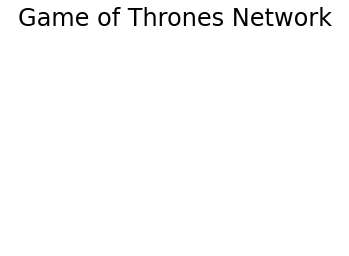

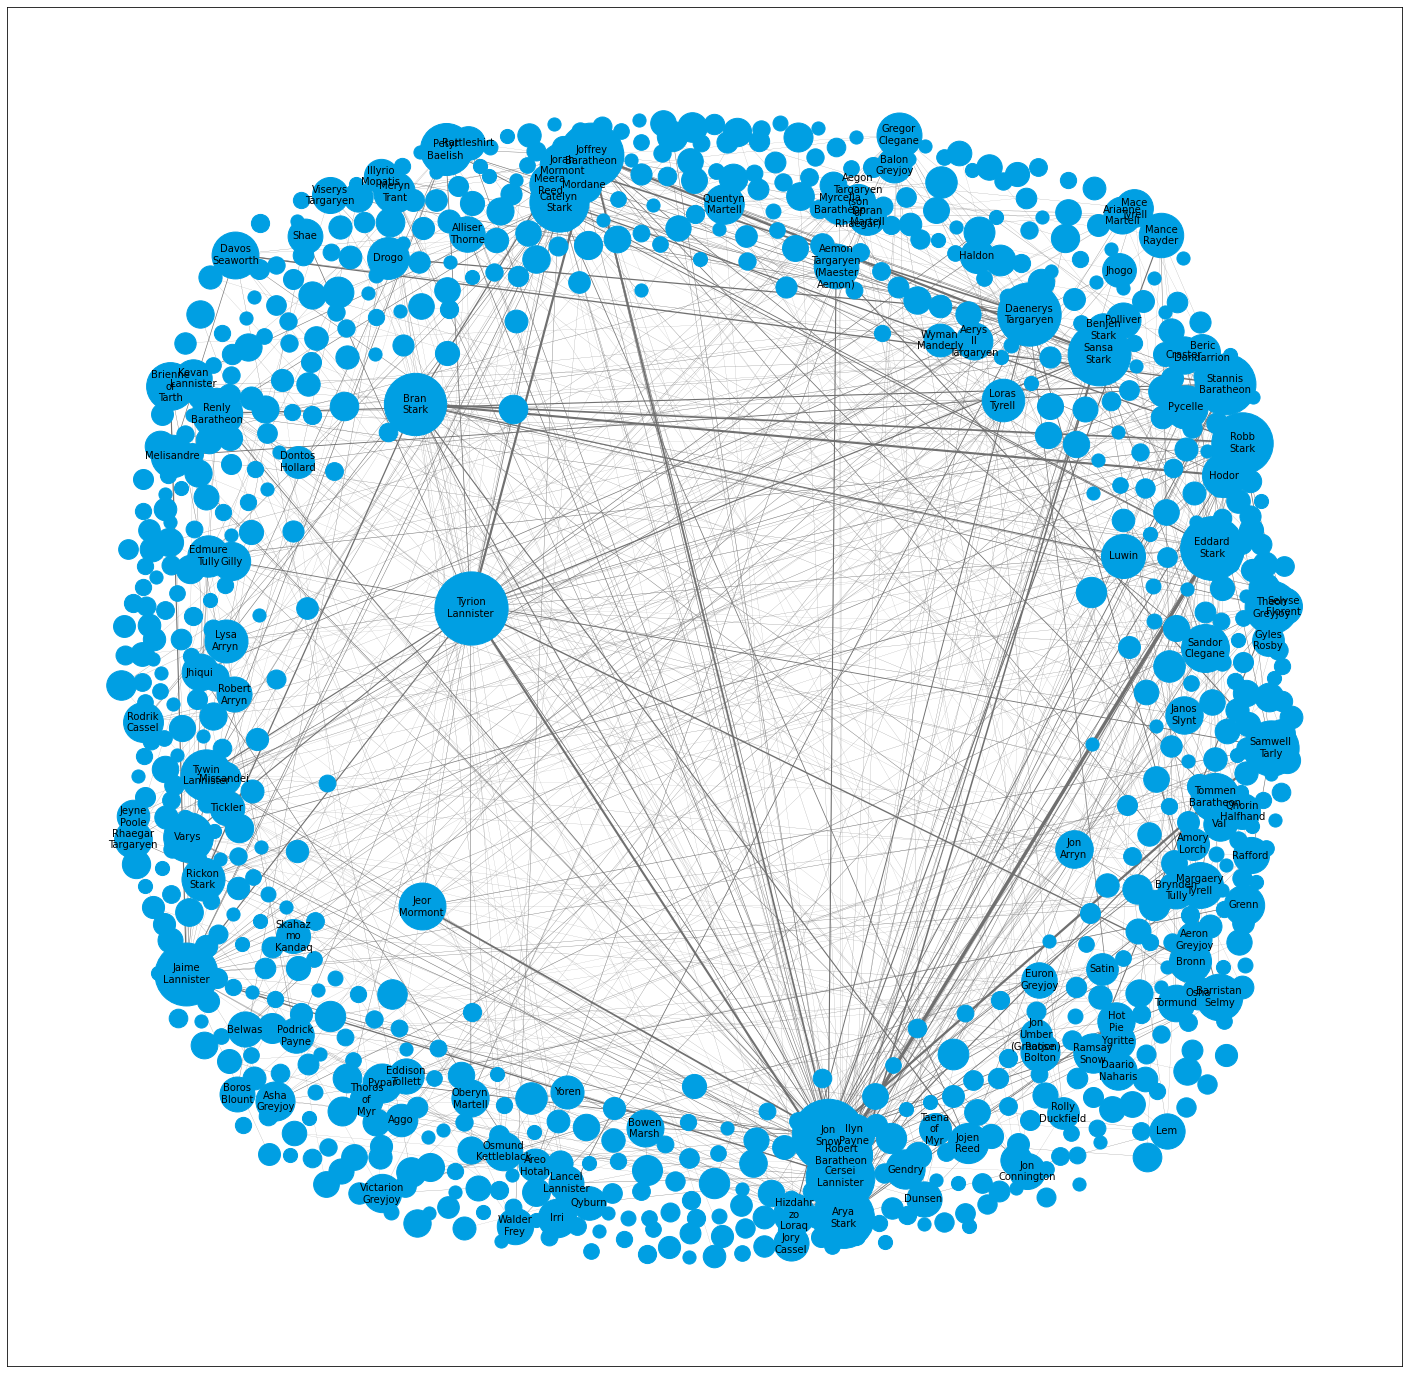

In [11]:
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)
plt.figure(figsize=(25,25))

pos1 = nx.spring_layout(GOT,weight='weight',iterations=20, k = 4) 
for node in GOT.nodes():
    size = 100*weighted_degrees[node]**0.5 # main characters will be bigger in dia
    ns = nx.draw_networkx_nodes(GOT,pos1,nodelist=[node], node_size=size, node_color='#009fe3')

nx.draw_networkx_labels(GOT,pos1,{n:n.replace('-','\n') for n in GOT.nodes() if weighted_degrees[n]>100},font_size=10);
# mentioning the names of the character in the node

for e in GOT.edges(data=True):
    if e[2]['weight']>10: 
        nx.draw_networkx_edges(GOT,pos1,[e],width=e[2]['weight']/100,edge_color='#707070')
# differentiating the edge thickness with weight values (thickness indicates how much time they had conversation)

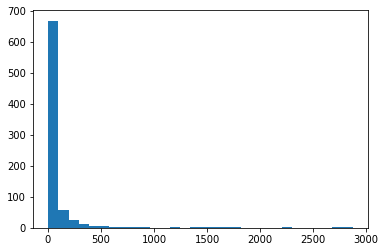

In [12]:
h = plt.hist(weighted_degrees.values(), bins = 30) 
# below 200 conversation many side characters are there. So, graph is more dense.
# We will identify only main character who had conversation with many peoples

In [13]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200]) 
# we are taking the characters who had conversations with more than 200 characters, 
# indirectly they will be the main characters

In [14]:
print(nx.info(subG)) # 63 nodes are main characters of the novel

Graph with 63 nodes and 496 edges


In [15]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4) 
# we are making a connection between the nodes in such a way that these two nodes are in equilibrium

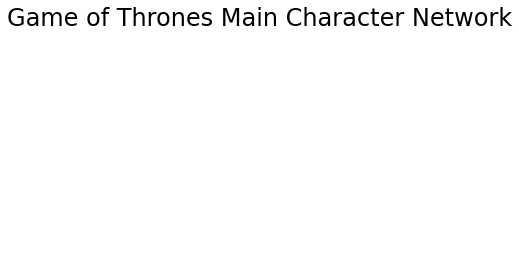

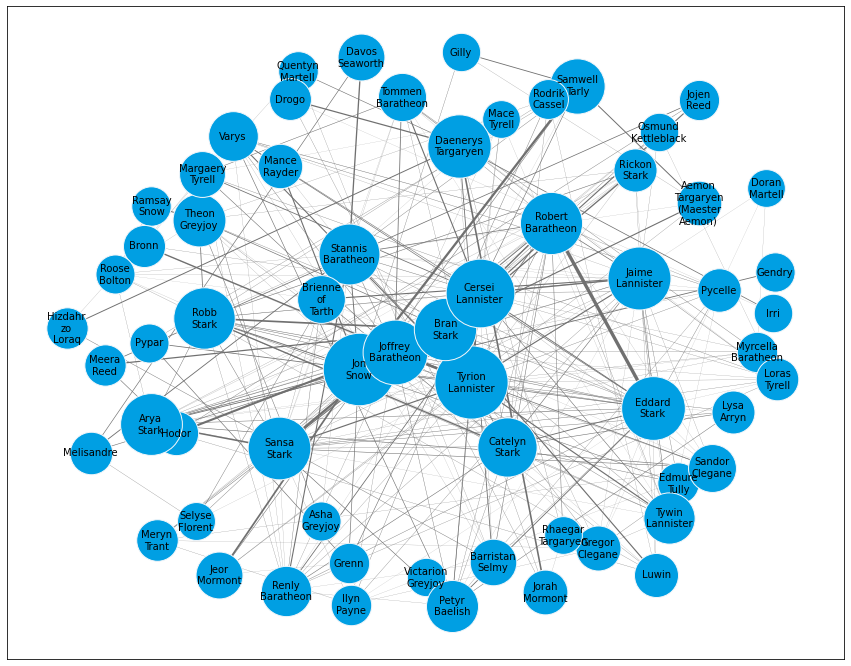

In [16]:
plt.axis('off')
plt.title('Game of Thrones Main Character Network',fontsize = 24)
plt.figure(figsize=(15,12))

for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.5 # main characters will be bigger in dia
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    # graph is drawn by taking subG as a base graph, pos for equilibrium distance between nodes
    # and selected nodes from nodelist
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);
# mentioning the names of the character in the node

for e in subG.edges(data=True):
    if e[2]['weight']>10: 
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')
# differentiating the edge thickness with weight values (thickness indicates how much time they had conversation)

### Question 2:
#### Identify the most important character. Importance is defined based on the degree of the node

In [17]:
character_name = list(weighted_degrees.keys())
degree_value = list(weighted_degrees.values())
ind = degree_value.index(max_degree)
most_imp_char = character_name[ind]
most_imp_char      # He had conversation with most of the characters, thats why degree is more for him

'Tyrion-Lannister'

### Question 3:
#### Find out the shortest path between the characters Addam-Marbrand and Ysilla. The shortest path is used to identify the closeness of two characters in the book.

### Shortest Path Without considering the weights

In [18]:
# In-Built -----------------------------------------------------------------------
nx.shortest_path(GOT, source='Addam-Marbrand', target='Ysilla')

['Addam-Marbrand', 'Tyrion-Lannister', 'Ysilla']

###### 7+11 = 18

In [19]:
# BFS Approach -------------------------------------------------------------------

def build_graph():
    edges1 = np.asarray(edges)
    graph = defaultdict(list)
     
    # Loop to iterate over every
    # edge of the graph
    for edge in edges1:
        a, b = edge[0], edge[1]
         
        # Creating the graph
        # as adjacency list
        graph[a].append(b)
        graph[b].append(a)
    return graph
 
if __name__ == "__main__":
    graph = build_graph()

In [20]:
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("So sorry, but a connecting"\
                "path doesn't exist :(")
    return
# Driver Code
if __name__ == "__main__":
     
    # Function Call
    BFS_SP(graph, 'Addam-Marbrand', 'Ysilla')

Shortest path =  Addam-Marbrand Tyrion-Lannister Ysilla


### Shortest Path with Weight taken into consideration

In [21]:
# In-Built of Dijkstra Algorithm--------------------------------------------------
nx.dijkstra_path(GOT,'Addam-Marbrand','Ysilla')

['Addam-Marbrand',
 'Tywin-Lannister',
 'Aegon-Targaryen-(son-of-Rhaegar)',
 'Ysilla']

###### 6+3+4 = 13

In [22]:
class Graph():
    def __init__(self):
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are bi-directional
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight

In [23]:
graph = Graph()

In [24]:
for edge in np.asarray(edges):
    graph.add_edge(*edge)

In [25]:
def dijsktra(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return path

In [26]:
dijsktra(graph, 'Addam-Marbrand', 'Ysilla')

['Addam-Marbrand',
 'Tywin-Lannister',
 'Aegon-Targaryen-(son-of-Rhaegar)',
 'Ysilla']

### Question 4:
#### Obtain the minimum spanning tree for the graph

In [27]:
MST = nx.minimum_spanning_tree(GOT)
print(nx.info(MST))

Graph with 796 nodes and 795 edges


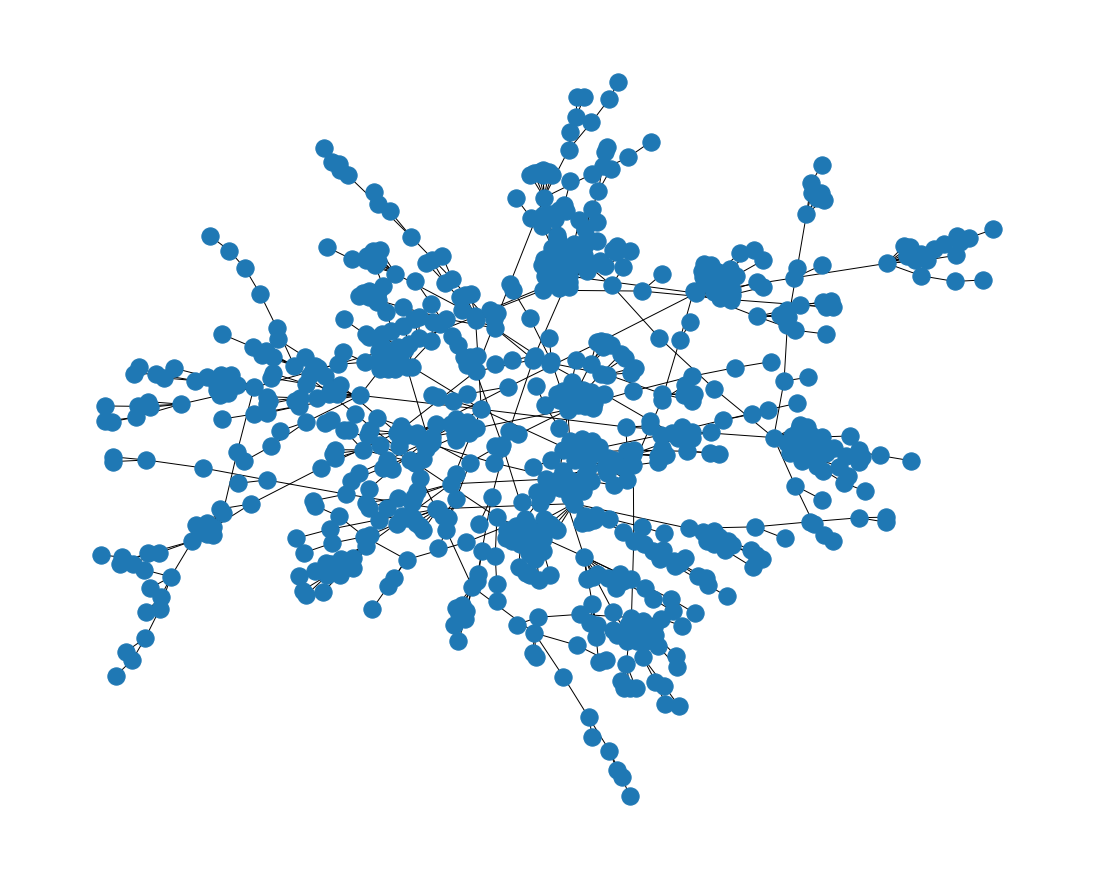

In [28]:
plt.figure(figsize=(15,12))
nx.draw(MST)